<a href="https://colab.research.google.com/github/Elwing-Chou/ximen_ai_20250630/blob/main/ximen_ai_0630.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

markdown語法

aaaadsfds


```python
# 此內容會顯示為程式碼
print(3)
abccfaf
defggh
```

Latex Math

$ \frac{1}{x^2}\pi $




```
1. 收集數據
分成兩部分: a. 訓練數據(給模型看) b. 測試數據(不給模型看)

2. 定義數據的輸入(x)/輸出(y)
e.g. 輸入: 坪數/樓層/公設有誤  輸出: 價格

3. 根據輸出的類型選擇你需要的演算法
a. 固定幾種的輸出: 分類問題(classification)
b. 數值類型的輸出: 回歸問題(regression)

4. 把你的"訓練數據"餵給你的演算法訓練出"模型"

5. 用"測試數據"對你的"模型"進行分析

ML(機器學習):
scikit-learn簡稱sklearn: 統計學方法
scipy: 冷門一點點的或者統計學方面的計算
matplotlib: 繪圖的函示庫

如果你要使用到colab沒有幫你裝的函式庫
!pip install xxx

```





```
分類問題: y固定數種的

數據是否足夠??????
考慮: 問題到底需要多少數據? 問題簡單:少 問題難: 數據多
1. 機器學習: 千/萬筆
2. 深度學習: 萬/十萬以上

分類問題: 越多種y就代表這問題越難
!! 通常越難的問題, 你的欄位數目也應該比較多

```





```
CSV: comma-separtated values
sl,sw,pl,pw
4.2,4.3,4.4,4.5

如果內容有逗號
content,name
"今天,天氣很好",adfasfds

```



In [48]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
# pandas資料型態: 1. DataFrame(2d表格) 2. Series(1d列/行)
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["y"] = iris["target"]
# df.to_csv("iris.csv", encoding="utf-8", index=False)
# df.to_excel("iris.xlsx")
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2




```python
# pandas drop demo
test = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=["a", "b"], index=["a", "b"])
test.drop("a", axis=1)
```



In [49]:
from sklearn.model_selection import train_test_split
# train_test_split([1, 2, 3, 4],
#                  [5, 6, 7, 8],
#                  test_size=0.25)

# 我先把x(輸入)和y(輸出)分出來
# 第一種: 我拿到最後一個欄位的前面
# x_cols = df.columns[:-1]
# df[x_cols]
# 第二種: drop掉y(記得axis=0/1兩種方向)
x = df.drop("y", axis=1)
y = df["y"]
# 90%x 10%x 90%y 10%y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


$ Gini = \sum {p_i}{(1-p_i)} $

```
Gini: 平均猜錯機率

決策數的每個問題都是: 掃過所有欄位, 所有的分割點, 決定出一個可以讓Gini變最小的地方

```





```
防止過度訓練!!!! 每一個演算法都要考慮

過度訓練(過擬合): 每一個演算法都有特定的方式去避免

決策樹避免過擬合: 避免長到最底

1. 前剪枝: 透過預先的參數設置來阻止長(通常選用)
2. 後剪枝: 如果我這個問題的Gini係數的減少很微量(精確但花時間)
```



In [50]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.6\ngini = 0.667\nsamples = 135\nvalue = [46, 45, 44]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 89\nvalue = [0, 45, 44]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.153\nsamples = 48\nvalue = [0, 44, 4]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]\nclass = virginica')]

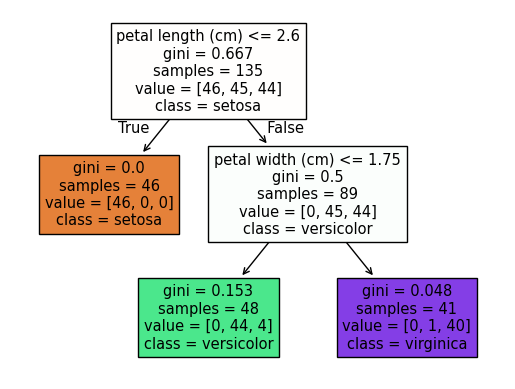

In [51]:
from sklearn.tree import plot_tree
plot_tree(clf,
          # max_depth=3,
          feature_names=iris["feature_names"],
          class_names=iris["target_names"],
          filled=True)

In [52]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
print(pre)
accuracy_score(pre, y_test)

[2 0 2 2 1 1 2 1 0 1 2 0 1 1 0]


0.9333333333333333



```
優點: 可解釋性!!!

```

